<p style="text-align: center;"> <span style="color:green"> <font size="5"> <b> Terpli </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="5"> Effect Generation 2: Concentrate Products </p> </b></font>
<p style="text-align: center;"> <b> Oct 2021 </b> </p>

# Import package and define functions

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import stats
import time
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
## create a function to summarize the data quality
def dataquality_numeric(raw):
    print(f'Dataset Shape:{raw.shape}')
    numeric_col = raw.select_dtypes(include=['int64','float64'])   
    summary = pd.DataFrame(numeric_col.dtypes,columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]  
    summary['# of Records'] = numeric_col.count().values
    summary['% populated'] = (((len(raw)-numeric_col.isnull().sum().values)/len(raw))*100).round(2)
    summary['# Zeros'] = numeric_col[numeric_col ==0].count().values
    summary['Uniques'] = numeric_col.nunique().values
    summary['Mean'] = numeric_col.mean().values
    summary['Maximum'] = numeric_col.max().values
    summary['Minimum'] = numeric_col.min().values
    summary['Standard Deviation'] = numeric_col.std().values
      
    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(numeric_col[name].value_counts(normalize = True),base = 2),2)
    return summary

## create a function to summarize the data quality for categorical variables
def dataquality_categorical(raw):
    print(f'Dataset Shape:{raw.shape}')
    categorical_col = raw.select_dtypes(include = ['object','category'])
    #print(categorical_col)
    summary = pd.DataFrame(categorical_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = categorical_col.count().values
    summary['% populated'] = (((len(raw) - categorical_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = categorical_col.isnull().sum().values \
    + categorical_col[categorical_col =='-1'].count().values
    summary['# Unique_Values'] = categorical_col.nunique().values
    summary['First_Value'] = categorical_col.loc[0].values
    summary['Second_Value'] = categorical_col.loc[1].values
    summary['Third_Value'] = categorical_col.loc[2].values
    count_value = pd.DataFrame(index = categorical_col.columns,columns = ['count'])
    most_common = pd.DataFrame(index = categorical_col.columns,columns = ['MostCommon'])
    #print(count_value)
    #print(most_common)
    for col in categorical_col.columns:
        count_value.loc[col,'count'] = categorical_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'MostCommon'] = categorical_col[col].mode().values 
        summary['% Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
        summary['Most_Common_Field'] = most_common['MostCommon'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(categorical_col[name].value_counts(normalize = True),base = 2),2)
    return summary

In [3]:
# raw = pd.read_excel('Cannabis-Profiles_Data Science.xlsx',sheet_name = 'Cannabis-Profiles_Data Science')

In [4]:
raw = pd.read_csv('Jan2022_Cannabis-Profiles_Data Science.csv')
outputname1 = 'mixed_clustered_Jan5.csv'
outputname2 = 'mixed_clustered_Jan5.xlsx'

In [5]:
raw.shape

(4493, 69)

In [6]:
#raw = raw.iloc[:3310,:]

In [7]:
raw.shape

(4493, 69)

In [8]:
raw.head()

,Unnamed: 0,Strain_Name,Batch_ID,A_Pinene,Distributor,Strain,MetricID,Type,Distributor_Address,Distributor_City_State_Zip,...,Other_Pct_Total,Total_Terpene_Volume_Pct_Total,THC_Pct_vs_CBD_Pct,THC_Pct_vs_Terpene_Pct,THC_Pct_vs_B_Caryophyllene_Pct,THC_Pct_vs_A_Pinene_Pct,THC_Pct_vs_B_Myrcene_Pct,THC_Pct_vs_Limonene_Pct,THC_Pct_vs_Linalool_Pct,THC_Pct_vs_Nerolidol_Pct
0,0,Birthday Cake,IND1_134,0.00,NaN,birthday cake,NaN,Vape Cartridge,NaN,NaN,...,0.000000e+00,1.0,NaN,0.00000,0.000000,NaN,0.00000,0.000000,0.000000,NaN
1,1,Dream Queen,S062819-3,1.47,0,dream queen,0,Flower - Cured,0,0,...,4.077472e-03,1.0,1555.25,0.18663,1.476484,2.490939,0.51356,2.302944,3.298811,5.905936
2,2,Sour Diesel,IND1_107,3.40,NaN,sour diesel,NaN,Vape Cartridge,NaN,NaN,...,0.000000e+00,1.0,NaN,0.00000,NaN,0.000000,0.00000,0.000000,NaN,NaN
3,3,Vibration,IND1_181,1.69,NaN,vibration,NaN,Flower - Cured,NaN,NaN,...,-1.850372e-16,1.0,NaN,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,4,Lava Cake,IND1_66,0.00,NaN,lava cake,NaN,Vape Cartridge,NaN,NaN,...,3.703704e-02,1.0,NaN,0.00000,NaN,NaN,0.00000,0.000000,0.000000,NaN


# Data Exploration

## Columns Annoation

In [9]:
raw.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

## Data Quality Table

In [10]:

numeric_DQR_raw = dataquality_numeric(raw)
numeric_DQR_raw

Dataset Shape:(4493, 69)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Unnamed: 0,int64,4493,100.00,1,4493,2246.000000,4492.000000,0.000000,1297.161709,12.13
1,A_Pinene,float64,4493,100.00,1003,519,1.230721,19.180000,0.000000,1.396121,7.32
2,B_Caryophyllene,float64,4493,100.00,517,1419,5.863903,70.500000,0.000000,5.653860,9.41
3,terpinolene,float64,4493,100.00,1837,1058,2.786081,51.080000,0.000000,5.225458,6.59
4,Total_Terpene_Volume,float64,4493,100.00,491,2934,33.710159,218.300000,0.000000,22.934872,10.63
5,A_Humulene,float64,4493,100.00,1058,637,1.551777,24.000000,0.000000,1.733691,7.39
6,B_Myrcene,float64,4493,100.00,577,2018,9.591433,64.150000,0.000000,9.812399,9.87
7,Ocimene,float64,4493,100.00,2208,632,1.197009,17.390000,0.000000,1.918548,5.51
8,D_Limonene,float64,4493,100.00,575,1681,7.100980,78.800000,0.000000,6.341534,9.65
9,B_Pinene,float64,4493,100.00,1139,451,1.229627,9.980000,0.000000,1.177820,7.10


In [11]:
categorical_DQR_raw = dataquality_categorical(raw)
categorical_DQR_raw

Dataset Shape:(4493, 69)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Strain_Name,object,4493,100.00,0,1757,Birthday Cake,Dream Queen,Sour Diesel,1.38,[SUPER SILVER HAZE],9.99
1,Batch_ID,object,4493,100.00,0,4491,IND1_134,S062819-3,IND1_107,0.04,"[GHFSTAR0903AA, GHFSTAR0903BB]",12.13
2,Distributor,object,4205,93.59,288,65,NaN,0,NaN,50.44,[Central Coast Ag Distribution. LLC],3.06
3,Strain,object,4493,100.00,0,1716,birthday cake,dream queen,sour diesel,1.89,[super silver haze],9.92
4,MetricID,object,4205,93.59,288,2879,NaN,0,NaN,29.18,[0],8.98
5,Type,object,4493,100.00,0,23,Vape Cartridge,Flower - Cured,Vape Cartridge,34.90,[Vape Cartridge],2.63
6,Distributor_Address,object,4205,93.59,288,71,NaN,0,NaN,27.85,[1201 W. Chestnut St.. Lompoc. CA 93436],3.87
7,Distributor_City_State_Zip,object,4205,93.59,288,4,NaN,0,NaN,99.38,[0],0.06
8,Producer,object,4205,93.59,288,82,NaN,0,NaN,27.85,[Central Coast AG Products. LLC],3.95
9,Brand,object,4493,100.00,0,78,Select,Unknown,Heavy Hitters,56.82,[Raw Garden],2.60


# Data Cleaning

## Remove unuseful rows

In [12]:
## the number of records that need 
len(raw[(raw['Total_Terpene_Volume'].isna()) |(raw['Total_Terpene_Volume']==0)| (raw['Matrix'] == 'Edible')])

491

In [13]:
raw_trimmed = raw.drop(
    raw[
        (raw['Total_Terpene_Volume'].isna()) |
        (raw['Total_Terpene_Volume']==0)|
        (raw['Matrix'] == 'Edible')].index)

## Correct Matrix

In [14]:
raw_trimmed['Matrix'] = raw_trimmed['Matrix'].replace('Concentrate','Concentrates & Extracts')
raw_trimmed['Matrix'] = raw_trimmed['Matrix'].replace('Plant - Cured','Plant')

In [15]:
raw_trimmed['Matrix'].value_counts()

Concentrates & Extracts    2811
Plant                      1191
Name: Matrix, dtype: int64

## Fill na and Remove inf

In [16]:
numeric_DQR_raw = dataquality_numeric(raw_trimmed)
numeric_DQR_raw[numeric_DQR_raw['% populated'] != 100]['Name'].values

Dataset Shape:(4002, 69)


array(['THC_Pct_vs_CBD_Pct', 'THC_Pct_vs_B_Caryophyllene_Pct',
       'THC_Pct_vs_A_Pinene_Pct', 'THC_Pct_vs_B_Myrcene_Pct',
       'THC_Pct_vs_Limonene_Pct', 'THC_Pct_vs_Linalool_Pct',
       'THC_Pct_vs_Nerolidol_Pct'], dtype=object)

In [17]:
raw_trimmed['THC_Pct_vs_B_Caryophyllene_Pct']= raw_trimmed['THC_Pct_vs_B_Caryophyllene_Pct'].fillna(0)
raw_trimmed['THC_Pct_vs_A_Pinene_Pct']= raw_trimmed['THC_Pct_vs_A_Pinene_Pct'].fillna(0)
raw_trimmed['THC_Pct_vs_B_Myrcene_Pct'] = raw_trimmed['THC_Pct_vs_B_Myrcene_Pct'].fillna(0)

In [18]:
numeric_DQR_raw = dataquality_numeric(raw_trimmed)
col_temp = numeric_DQR_raw[numeric_DQR_raw['Mean'] == np.inf]['Name'].values
col_temp 

Dataset Shape:(4002, 69)


array(['THC_Pct_vs_CBD_Pct', 'THC_Pct_vs_B_Caryophyllene_Pct',
       'THC_Pct_vs_A_Pinene_Pct', 'THC_Pct_vs_B_Myrcene_Pct',
       'THC_Pct_vs_Limonene_Pct', 'THC_Pct_vs_Linalool_Pct',
       'THC_Pct_vs_Nerolidol_Pct'], dtype=object)

In [19]:
for col in col_temp:
    themax = raw_trimmed[col].replace([np.inf, -np.inf], np.nan).dropna().max()
    raw_trimmed[col].replace([np.inf, -np.inf], themax , inplace=True)


In [20]:
numeric_DQR_raw = dataquality_numeric(raw_trimmed)
numeric_DQR_raw[numeric_DQR_raw['Mean'] == np.inf]['Name'].values


Dataset Shape:(4002, 69)


array([], dtype=object)

## Normalize Other ratios

The other ratio columns should be normalized

In [21]:
need_norm_cols = ['Total_Cannabinoid_Pct','Total_Terpene_Volume_Pct_Total', 
                  'THC_Pct_vs_CBD_Pct', 'THC_Pct_vs_Terpene_Pct',
       'THC_Pct_vs_B_Caryophyllene_Pct', 'THC_Pct_vs_A_Pinene_Pct',
       'THC_Pct_vs_B_Myrcene_Pct', 'THC_Pct_vs_Limonene_Pct', 'THC_Pct_vs_Linalool_Pct',
       'THC_Pct_vs_Nerolidol_Pct']


In [22]:
other_ratio_cols  = ['THC_Pct_vs_CBD_Pct', 'THC_Pct_vs_Terpene_Pct',
       'THC_Pct_vs_B_Caryophyllene_Pct', 'THC_Pct_vs_A_Pinene_Pct',
       'THC_Pct_vs_B_Myrcene_Pct', 'THC_Pct_vs_Limonene_Pct', 'THC_Pct_vs_Linalool_Pct',
       'THC_Pct_vs_Nerolidol_Pct']

In [23]:
def min_max_norm(col):
    
    raw_trimmed[f'{col}_norm'] = (raw_trimmed[col] - raw_trimmed[col].min())/(raw_trimmed[col].max()- raw_trimmed[col].min())


In [24]:
for col in need_norm_cols:
    min_max_norm(col)

In [25]:
raw_trimmed.iloc[:,71:]

,THC_Pct_vs_CBD_Pct_norm,THC_Pct_vs_Terpene_Pct_norm,THC_Pct_vs_B_Caryophyllene_Pct_norm,THC_Pct_vs_A_Pinene_Pct_norm,THC_Pct_vs_B_Myrcene_Pct_norm,THC_Pct_vs_Limonene_Pct_norm,THC_Pct_vs_Linalool_Pct_norm,THC_Pct_vs_Nerolidol_Pct_norm
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.035661,0.186263,0.010541,0.011251,0.002946,0.025791,0.006442,0.003137
2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
4488,0.007557,0.230246,0.003784,1.000000,0.010399,0.025837,0.004664,1.000000
4489,0.004560,0.291785,0.006511,0.051288,0.010684,0.013594,0.015275,1.000000
4490,0.005669,0.234428,0.003954,1.000000,0.009627,0.024806,0.004701,1.000000
4491,0.010146,0.273791,0.003494,1.000000,0.045425,0.040644,0.007238,1.000000


In [26]:

## also normalize the Total_Terpene_Volume
min_max_norm('Total_Terpene_Volume')

In [27]:
raw_trimmed.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

In [28]:
other_ratio_norm_cols = ['THC_Pct_vs_CBD_Pct_norm',
       'THC_Pct_vs_Terpene_Pct_norm', 'THC_Pct_vs_B_Caryophyllene_Pct_norm',
       'THC_Pct_vs_A_Pinene_Pct_norm', 'THC_Pct_vs_B_Myrcene_Pct_norm',
       'THC_Pct_vs_Limonene_Pct_norm', 'THC_Pct_vs_Linalool_Pct_norm',
       'THC_Pct_vs_Nerolidol_Pct_norm']

In [29]:
## fill na
raw_trimmed[other_ratio_norm_cols] = raw_trimmed[other_ratio_norm_cols].fillna(0)

In [30]:
## assign an identifier
raw_trimmed['id'] = list(range(1,len(raw_trimmed)+1))

# Select Data

In [31]:
concentrate = raw_trimmed[raw_trimmed['Matrix'] == 'Concentrates & Extracts']
plant = raw_trimmed[raw_trimmed['Matrix'] == 'Plant']

In [32]:
concentrate.shape

(2811, 81)

In [33]:
plant.shape

(1191, 81)

In [34]:
## switch the type to 'mixed'
concentrate = raw_trimmed

In the following code, variable 'concentrate' is equal to 'raw_trimmed', which also includes the flower data. 

# Feature Engineering

In [35]:
concentrate.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

Separate the features for concentrate products.

In [36]:
cannbinoids = concentrate[['THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct']]

In [37]:
cannbinoids['Total_Cannabinoid_Pct_norm'] = concentrate['Total_Cannabinoid_Pct_norm']

In [38]:
cannbinoids.columns

Index(['THC_Pct', 'CBD_Pct', 'CBG_Pct', 'CBN_Pct', 'CBC_Pct', 'CBDV_Pct',
       'THCV_Pct', 'CBL_Pct', 'Total_Cannabinoid_Pct_norm'],
      dtype='object')

In [39]:
cannbinoids.describe()

,THC_Pct,CBD_Pct,CBG_Pct,CBN_Pct,CBC_Pct,CBDV_Pct,THCV_Pct,CBL_Pct,Total_Cannabinoid_Pct_norm
count,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000
mean,0.637517,0.005753,0.019232,0.000379,0.001366,0.000026,0.002450,0.000011,0.664839
std,0.308062,0.038092,0.013452,0.001076,0.002903,0.000230,0.004075,0.000338,0.311311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304085,0.000000,0.008150,0.000000,0.000000,0.000000,0.000000,0.000000,0.323612
50%,0.810165,0.000440,0.019010,0.000000,0.000000,0.000000,0.000985,0.000000,0.840239
75%,0.849475,0.001410,0.028557,0.000000,0.001577,0.000000,0.003740,0.000000,0.882608
max,1.001970,0.559340,0.071390,0.013500,0.034260,0.003880,0.052340,0.018100,1.000000


In [40]:
concentrate.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

In [41]:
terpenes = concentrate[[ 'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total',
       'Linalool_Pct_Total', 'Ocimene_Pct_Total', 'Nerolidol_Pct_Total',
       'A_Bisabalol_Pct_Total', 'Other_Pct_Total']]

In [42]:
terpenes['Total_Terpene_Volume_norm'] = concentrate['Total_Terpene_Volume_norm']

In [43]:
terpenes

,B_Myrcene_Pct_Total,B_Caryophyllene_Pct_Total,D_Limonene_Pct_Total,A_Pinene_Pct_Total,B_Pinene_Pct_Total,A_Humulene_Pct_Total,terpinolene_Pct_Total,Linalool_Pct_Total,Ocimene_Pct_Total,Nerolidol_Pct_Total,A_Bisabalol_Pct_Total,Other_Pct_Total,Total_Terpene_Volume_norm
0,0.648717,0.091345,0.101494,0.000000,0.029039,0.023400,0.010713,0.015506,0.068227,0.000000,0.011559,0.000000e+00,0.160868
1,0.363405,0.126402,0.081040,0.074924,0.042813,0.049439,0.000000,0.056575,0.149847,0.031600,0.019878,4.077472e-03,0.088122
2,0.204524,0.000000,0.299326,0.163619,0.311838,0.000000,0.000000,0.000000,0.000000,0.000000,0.020693,0.000000e+00,0.093446
3,0.075521,0.184375,0.300000,0.088021,0.071875,0.050521,0.000000,0.131250,0.015104,0.035417,0.047917,-1.850372e-16,0.086194
4,0.478610,0.000000,0.130635,0.000000,0.000000,0.000000,0.244330,0.097043,0.000000,0.000000,0.012346,3.703704e-02,0.157931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,0.127273,0.435227,0.100000,0.000000,0.017045,0.160227,0.000000,0.096591,0.000000,0.000000,0.064773,-1.136364e-03,0.038462
4489,0.156977,0.320598,0.240864,0.025748,0.044020,0.132890,0.000000,0.037375,0.000000,0.000000,0.041528,0.000000e+00,0.053332
4490,0.139979,0.424178,0.106045,0.000000,0.019088,0.154825,0.000000,0.097561,0.000000,0.000000,0.057264,1.060445e-03,0.041353
4491,0.034646,0.560630,0.075591,0.000000,0.000000,0.171654,0.000000,0.074016,0.000000,0.000000,0.083465,0.000000e+00,0.027217


In [45]:
other_ratios =concentrate[[
       'THC_Pct_vs_CBD_Pct_norm', 'THC_Pct_vs_Terpene_Pct_norm',
       'THC_Pct_vs_B_Caryophyllene_Pct_norm', 'THC_Pct_vs_A_Pinene_Pct_norm',
       'THC_Pct_vs_B_Myrcene_Pct_norm', 'THC_Pct_vs_Limonene_Pct_norm',
       'THC_Pct_vs_Linalool_Pct_norm', 'THC_Pct_vs_Nerolidol_Pct_norm']]

In [46]:
other_ratios

,THC_Pct_vs_CBD_Pct_norm,THC_Pct_vs_Terpene_Pct_norm,THC_Pct_vs_B_Caryophyllene_Pct_norm,THC_Pct_vs_A_Pinene_Pct_norm,THC_Pct_vs_B_Myrcene_Pct_norm,THC_Pct_vs_Limonene_Pct_norm,THC_Pct_vs_Linalool_Pct_norm,THC_Pct_vs_Nerolidol_Pct_norm
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.035661,0.186263,0.010541,0.011251,0.002946,0.025791,0.006442,0.003137
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
4488,0.007557,0.230246,0.003784,1.000000,0.010399,0.025837,0.004664,1.000000
4489,0.004560,0.291785,0.006511,0.051288,0.010684,0.013594,0.015275,1.000000
4490,0.005669,0.234428,0.003954,1.000000,0.009627,0.024806,0.004701,1.000000
4491,0.010146,0.273791,0.003494,1.000000,0.045425,0.040644,0.007238,1.000000


# Model Building

## Hierachical Clustering with Terpenes first

### First Layer: Terpenes

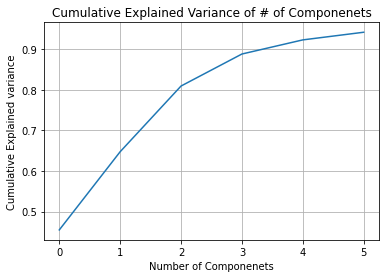

In [47]:
from sklearn.decomposition import PCA

# for i in range(1,20):
    
#     pca = PCA(n_components=i)
#     pca.fit(concentrate_cannbi)
#     print(sum(pca.explained_variance_ratio_))
    
pca=PCA(n_components=6,svd_solver="full")
pca.fit(terpenes)

plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.title("Cumulative Explained Variance of # of Componenets")
plt.xlabel("Number of Componenets")
plt.ylabel("Cumulative Explained variance")   
plt.grid()

In [48]:
pca = PCA(n_components = 6)
pc_terpenes = pca.fit_transform(terpenes)
pca.explained_variance_ratio_.sum()

0.9417222694344489

100%|███████████████████████████████████████████| 18/18 [00:02<00:00,  8.03it/s]


<AxesSubplot:xlabel='K', ylabel='Sum of Squares'>

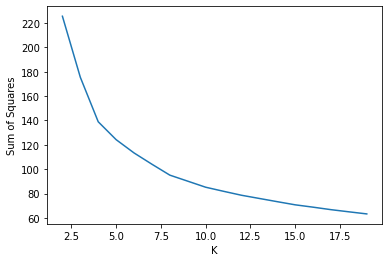

In [49]:
# now, let's do it for all values of k between 2 and 10
#define an empty list to hold all sum of squares (ss)
from sklearn import cluster
ss = []
for i in tqdm(range(2, 20)):
    model = cluster.KMeans(n_clusters=i, random_state=10)
    clusters = model.fit_predict(pc_terpenes)
    #concentrate['cluster_cannabi_only'] = clusters
    centers = model.cluster_centers_
    ss.append(model.inertia_)
    #print(ss)
%matplotlib inline
# plot the elbow plot
data = pd.DataFrame({'K': range(2,20),
'Sum of Squares':ss})
sns.lineplot(data = data,
x = 'K',
y = 'Sum of Squares')

In [50]:
%%time
from sklearn import cluster
model = cluster.KMeans(n_clusters = 6, random_state = 10)
#fit the created k-means model to our data

model.fit(pc_terpenes)

concentrate['cluster_terpene_only'] = model.labels_

CPU times: user 488 ms, sys: 576 ms, total: 1.06 s
Wall time: 128 ms


In [51]:
concentrate['cluster_terpene_only'].value_counts()

0    1014
1     860
5     653
4     564
3     489
2     422
Name: cluster_terpene_only, dtype: int64

In [52]:
concentrate.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

### Second Layer: Cannbinoids

In [53]:
cannbinoids_col = list(cannbinoids.columns)

In [54]:
from sklearn import cluster

def sub_cluster(i):
   
    concentrate_i_cannbinoids = concentrate[(concentrate['cluster_terpene_only'] == i)][cannbinoids_col]
    print(concentrate_i_cannbinoids)
    concentrate_i = concentrate[(concentrate['cluster_terpene_only'] == i) ]
    #print(concentrate_i)
    
    pca = PCA(n_components = 6)
    cannabi_pc = pca.fit_transform(concentrate_i_cannbinoids)
    #print(pca.explained_variance_ratio_.sum())

    model = cluster.KMeans(n_clusters = 4, random_state = 10)
    #fit the created k-means model to our data

    model.fit(cannabi_pc)

    labels = model.labels_
    concentrate_i['terpenefirst_sub_cluster'] = labels
    #concentrate_i
    return concentrate_i


In [55]:
n_components = 6
concentrate_subcluster_new = pd.DataFrame()
for i in range(n_components):
        temp = sub_cluster(i)
        concentrate_subcluster_new = pd.concat([concentrate_subcluster_new,temp])
        

      THC_Pct  CBD_Pct  CBG_Pct  CBN_Pct  CBC_Pct  CBDV_Pct  THCV_Pct  \
3     0.00000  0.00000  0.00000      0.0  0.00000       0.0   0.00000   
13    0.00000  0.00000  0.00000      0.0  0.00000       0.0   0.00000   
19    0.22765  0.00040  0.00272      0.0  0.00000       0.0   0.00000   
27    0.00000  0.00000  0.00000      0.0  0.00000       0.0   0.00000   
30    0.00000  0.00000  0.00000      0.0  0.00000       0.0   0.00000   
...       ...      ...      ...      ...      ...       ...       ...   
4480  0.32340  0.00075  0.01372      0.0  0.00436       0.0   0.00204   
4482  0.25542  0.00050  0.00677      0.0  0.00231       0.0   0.00107   
4484  0.30599  0.00064  0.01214      0.0  0.00628       0.0   0.00179   
4489  0.29236  0.00147  0.00967      0.0  0.00275       0.0   0.00134   
4492  0.32606  0.00157  0.01045      0.0  0.00307       0.0   0.00150   

      CBL_Pct  Total_Cannabinoid_Pct_norm  
3         0.0                    0.000000  
13        0.0                    0.

In [56]:
concentrate_subcluster_new['terpenefirst_sub_cluster'].value_counts()

0    1509
1     962
3     769
2     762
Name: terpenefirst_sub_cluster, dtype: int64

In [59]:
concentrate_subcluster_groupby_count =concentrate_subcluster_new.groupby(['cluster_terpene_only',
                                                                          'terpenefirst_sub_cluster']).agg({'THC_Pct':'mean',
                                                                            'THC_Pct':'mean',
                                                                           'Total_Terpene_Volume':'mean',
                                                                           'id':'count'})

concentrate_subcluster_groupby_count

THC_Pct  Total_Terpene_Volume  \
cluster_terpene_only terpenefirst_sub_cluster                                   
0                    0                         0.003833             19.596463   
                     1                         0.888397             38.490159   
                     2                         0.288563             15.526960   
                     3                         0.796355             47.375314   
1                    0                         0.817562             50.210835   
                     1                         0.300340             18.742443   
                     2                         0.018582             20.827447   
                     3                         0.924524             39.110548   
2                    0                         0.264725             16.245435   
                     1                         0.847739             49.763844   
                     2                         0.000000             30.704118   
                     3                         0.388554             65.547778   
3                    0                         0.000000             12.192967   
                     1                         0.896747             34.585195   
                     2                         0.263899             10.387225   
                     3                         0.791221             47.985804   
4                    0                         0.820641             52.835049   
                     1                         0.000000             21.811212   
                     2                         0.278208             16.834091   
                     3                         0.888479             41.534066   
5                    0                         0.847766             52.810263   
                     1                         0.275740             16.997044   
                     2                         0.016474             22.624314   
                     3                         0.421933             65.295882   

                                                id  
cluster_terpene_only terpenefirst_sub_cluster       
0                    0                          82  
                     1                         252  
                     2                         377  
                     3                         303  
1                    0                         491  
                     1                         176  
                     2                          47  
                     3                         146  
2                    0                          46  
                     1                         333  
                     2                          34  
                     3                           9  
3                    0                          91  
                     1                          77  
                     2                         209  
                     3                         112  
4                    0                         305  
                     1                          33  
                     2                          44  
                     3                         182  
5                    0                         494  
                     1                          91  
                     2                          51  
                     3                          17

In [60]:
concentrate_subcluster_groupby_count.loc[(0,1),'id']

252

In [61]:
len(concentrate_subcluster_new)

4002

### Third Layer: other ratios

In [62]:
from sklearn import cluster

def sub_cluster_2(i,j):
    
    
    concentrate_i_j_ratios = concentrate_subcluster_new[(concentrate_subcluster_new['cluster_terpene_only'] == i) & (concentrate_subcluster_new['terpenefirst_sub_cluster'] == j)][other_ratio_norm_cols]
    print(concentrate_i_j_ratios)
    concentrate_i_j = concentrate_subcluster_new[(concentrate_subcluster_new['cluster_terpene_only'] == i) & (concentrate_subcluster_new['terpenefirst_sub_cluster'] == j)]
    
    if concentrate_subcluster_groupby_count.loc[(i,j),'id']>5:
        print(concentrate_subcluster_groupby_count.loc[(i,j),'id'])
    
        pca = PCA(n_components = 5)
        ratios_pc = pca.fit_transform(concentrate_i_j_ratios)
        #print(pca.explained_variance_ratio_.sum())

        model = cluster.KMeans(n_clusters = 5, random_state = 10)
        #fit the created k-means model to our data

        model.fit(ratios_pc)

        labels = model.labels_
        concentrate_i_j['terpenefirst_sub_cluster2'] = labels
    else:
        concentrate_i_j['terpenefirst_sub_cluster2'] = 0
        print(f'not enough record ({i},{j})')
    #concentrate_i_j
    return concentrate_i_j


In [63]:
concentrate_subcluster_new_2 = pd.DataFrame()
for i in [0,1,2,3,4,5]:
    for j in [0,1,2,3]:
        temp = sub_cluster_2(i,j)
        concentrate_subcluster_new_2 = pd.concat([concentrate_subcluster_new_2,temp])
        print(len(concentrate_subcluster_new_2))
        


      THC_Pct_vs_CBD_Pct_norm  THC_Pct_vs_Terpene_Pct_norm  \
3                    0.000000                     0.000000   
13                   0.000000                     0.000000   
27                   0.000000                     0.000000   
30                   0.000000                     0.000000   
35                   0.000000                     0.000000   
...                       ...                          ...   
3863                 0.000003                     0.020859   
4054                 0.000013                     0.060244   
4308                 0.000009                     0.035959   
4326                 0.000016                     0.077268   
4465                 0.000024                     0.098516   

      THC_Pct_vs_B_Caryophyllene_Pct_norm  THC_Pct_vs_A_Pinene_Pct_norm  \
3                                0.000000                      0.000000   
13                               0.000000                      0.000000   
27                            

3934
      THC_Pct_vs_CBD_Pct_norm  THC_Pct_vs_Terpene_Pct_norm  \
0                0.000000e+00                     0.000000   
4                0.000000e+00                     0.000000   
6                0.000000e+00                     0.000000   
23               0.000000e+00                     0.000000   
53               0.000000e+00                     0.000000   
81               2.070982e-05                     0.079473   
96               0.000000e+00                     0.000000   
99               0.000000e+00                     0.000000   
117              0.000000e+00                     0.000000   
128              0.000000e+00                     0.000000   
139              0.000000e+00                     0.000000   
147              0.000000e+00                     0.000000   
177              0.000000e+00                     0.000000   
197              0.000000e+00                     0.000000   
210              0.000000e+00                     0.000000   
233

In [64]:
concentrate_subcluster_new_2['terpenefirst_sub_cluster2'] = concentrate_subcluster_new_2['terpenefirst_sub_cluster2'].astype('int')

In [65]:
len(concentrate_subcluster_new_2)

4002

In [66]:
concentrate_subcluster_new_2 = concentrate_subcluster_new_2.fillna(0)

In [67]:
concentrate_subcluster_new_2['terpenefirst_sub_cluster'] = concentrate_subcluster_new_2['terpenefirst_sub_cluster'].astype('int')
concentrate_subcluster_new_2['terpenefirst_sub_cluster2'] = concentrate_subcluster_new_2['terpenefirst_sub_cluster2'].astype('int')

In [70]:
concentrate_subcluster_new_2.groupby(['cluster_terpene_only','terpenefirst_sub_cluster','terpenefirst_sub_cluster2']).agg({'THC_Pct':'mean',
                                                                            'THC_Pct':'mean',
                                                                           'Total_Terpene_Volume':'mean',
                                                                           'id':'count'}).head(51)

THC_Pct  \
cluster_terpene_only terpenefirst_sub_cluster terpenefirst_sub_cluster2             
0                    0                        0                          0.000000   
                                              1                          0.060363   
                                              2                          0.077420   
                                              3                          0.025943   
                                              4                          0.098710   
                     1                        0                          0.883551   
                                              1                          0.900283   
                                              2                          0.894457   
                                              3                          0.902974   
                                              4                          0.865933   
                     2                        0                          0.317662   
                                              1                          0.256756   
                                              2                          0.285494   
                                              3                          0.274099   
                                              4                          0.312934   
                     3                        0                          0.801065   
                                              1                          0.799930   
                                              2                          0.780457   
                                              3                          0.795930   
                                              4                          0.799563   
1                    0                        0                          0.818056   
                                              1                          0.821544   
                                              2                          0.817173   
                                              3                          0.796290   
                                              4                          0.832489   
                     1                        0                          0.342004   
                                              1                          0.252887   
                                              2                          0.285207   
                                              3                          0.284085   
                                              4                          0.337640   
                     2                        0                          0.000727   
                                              1                          0.014066   
                                              2                          0.077393   
                                              3                          0.079547   
                                              4                          0.039820   
                     3                        0                          0.923625   
                                              1                          0.904110   
                                              2                          0.949817   
                                              3                          0.901137   
                                              4                          0.932717   
2                    0                        0                          0.206054   
                                              1                          0.266985   
                                              2                          0.278060   
                                              3                          0.242747   
                                              4                          0.251050   
                     1                        0                          0.8303

In [71]:
concentrate_subcluster_new_2['terpenefirst_multilayer_label'] = concentrate_subcluster_new_2['cluster_terpene_only'].astype('str') +concentrate_subcluster_new_2['terpenefirst_sub_cluster'].astype('str')+concentrate_subcluster_new_2['terpenefirst_sub_cluster2'].astype('str')

In [72]:
concentrate_subcluster_new_2['terpenefirst_multilayer_label'].value_counts().index

Index(['100', '500', '022', '031', '010', '400', '502', '210', '401', '300',
       ...
       '123', '124', '532', '230', '523', '522', '524', '004', '002', '001'],
      dtype='object', length=108)

In [73]:
#new = concentrate_subcluster_new_2[['cluster_terpene_only','terpenefirst_sub_cluster','terpenefirst_sub_cluster2','terpenefirst_multilayer_label']]
concentrate_subcluster_second_version = concentrate_subcluster_new_2

In [74]:
concentrate_subcluster_second_version.isna().sum()

Unnamed: 0                       0
Strain_Name                      0
Batch_ID                         0
A_Pinene                         0
Distributor                      0
                                ..
id                               0
cluster_terpene_only             0
terpenefirst_sub_cluster         0
terpenefirst_sub_cluster2        0
terpenefirst_multilayer_label    0
Length: 85, dtype: int64

In [75]:
len(concentrate_subcluster_second_version)

4002

# Group by dominant terpenes

## Find the top 3 dominant terpenes 

In [76]:
terpenes.columns

Index(['B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
       'Ocimene_Pct_Total', 'Nerolidol_Pct_Total', 'A_Bisabalol_Pct_Total',
       'Other_Pct_Total', 'Total_Terpene_Volume_norm'],
      dtype='object')

In [77]:
terpenes_temp = terpenes.iloc[:,0:-1]

In [78]:
terpenes_temp

,B_Myrcene_Pct_Total,B_Caryophyllene_Pct_Total,D_Limonene_Pct_Total,A_Pinene_Pct_Total,B_Pinene_Pct_Total,A_Humulene_Pct_Total,terpinolene_Pct_Total,Linalool_Pct_Total,Ocimene_Pct_Total,Nerolidol_Pct_Total,A_Bisabalol_Pct_Total,Other_Pct_Total
0,0.648717,0.091345,0.101494,0.000000,0.029039,0.023400,0.010713,0.015506,0.068227,0.000000,0.011559,0.000000e+00
1,0.363405,0.126402,0.081040,0.074924,0.042813,0.049439,0.000000,0.056575,0.149847,0.031600,0.019878,4.077472e-03
2,0.204524,0.000000,0.299326,0.163619,0.311838,0.000000,0.000000,0.000000,0.000000,0.000000,0.020693,0.000000e+00
3,0.075521,0.184375,0.300000,0.088021,0.071875,0.050521,0.000000,0.131250,0.015104,0.035417,0.047917,-1.850372e-16
4,0.478610,0.000000,0.130635,0.000000,0.000000,0.000000,0.244330,0.097043,0.000000,0.000000,0.012346,3.703704e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
4488,0.127273,0.435227,0.100000,0.000000,0.017045,0.160227,0.000000,0.096591,0.000000,0.000000,0.064773,-1.136364e-03
4489,0.156977,0.320598,0.240864,0.025748,0.044020,0.132890,0.000000,0.037375,0.000000,0.000000,0.041528,0.000000e+00
4490,0.139979,0.424178,0.106045,0.000000,0.019088,0.154825,0.000000,0.097561,0.000000,0.000000,0.057264,1.060445e-03
4491,0.034646,0.560630,0.075591,0.000000,0.000000,0.171654,0.000000,0.074016,0.000000,0.000000,0.083465,0.000000e+00


In [79]:
dominant_terpene = pd.DataFrame(columns = ['dominant_terpene'], index = range(len(terpenes_temp.index)))

In [80]:
## find the largest terpene value in one row and return its column name

dominant_terpene = pd.DataFrame(columns = ['dominant_terpene'], index = range(len(terpenes_temp.index)))
for i in terpenes_temp.index:
    for col in terpenes_temp:
        if terpenes_temp.loc[i,col] == terpenes_temp.max(axis = 1)[i]:
            dominant_terpene.loc[i,'dominant_terpene']  = col

In [81]:
concentrate_subcluster_second_version['dominant_terpene'] = dominant_terpene['dominant_terpene']

In [82]:
concentrate_subcluster_second_version['dominant_terpene'].value_counts()

B_Myrcene_Pct_Total          1591
B_Caryophyllene_Pct_Total    1214
D_Limonene_Pct_Total          824
terpinolene_Pct_Total         317
A_Pinene_Pct_Total             14
Nerolidol_Pct_Total            12
Other_Pct_Total                10
Linalool_Pct_Total              9
Ocimene_Pct_Total               6
B_Pinene_Pct_Total              3
A_Bisabalol_Pct_Total           1
A_Humulene_Pct_Total            1
Name: dominant_terpene, dtype: int64

In [83]:
## find the second largest value in one row. 

# second_dominant_terpene = pd.DataFrame(columns = ['second_dominant_terpene'], index = range(len(terpenes_temp.index)))
# for i in tqdm(terpenes_temp.index):
#     for col in terpenes_temp:
#         if terpenes_temp.loc[i,col] == terpenes_temp.apply(lambda row:row.nlargest(2).values[-1],axis = 1)[i]:
#             second_dominant_terpene.loc[i,'second_dominant_terpene']  = col
            
            
#terpenes_temp.apply(lambda row: row.nlargest(2).values[-1],axis=1)
# concentrate_subcluster_second_version['second_dominant_terpene'] = second_dominant_terpene['second_dominant_terpene']

In [84]:
terpenes_temp.reset_index(inplace = True)

In [85]:
terpenes_temp

,index,B_Myrcene_Pct_Total,B_Caryophyllene_Pct_Total,D_Limonene_Pct_Total,A_Pinene_Pct_Total,B_Pinene_Pct_Total,A_Humulene_Pct_Total,terpinolene_Pct_Total,Linalool_Pct_Total,Ocimene_Pct_Total,Nerolidol_Pct_Total,A_Bisabalol_Pct_Total,Other_Pct_Total
0,0,0.648717,0.091345,0.101494,0.000000,0.029039,0.023400,0.010713,0.015506,0.068227,0.000000,0.011559,0.000000e+00
1,1,0.363405,0.126402,0.081040,0.074924,0.042813,0.049439,0.000000,0.056575,0.149847,0.031600,0.019878,4.077472e-03
2,2,0.204524,0.000000,0.299326,0.163619,0.311838,0.000000,0.000000,0.000000,0.000000,0.000000,0.020693,0.000000e+00
3,3,0.075521,0.184375,0.300000,0.088021,0.071875,0.050521,0.000000,0.131250,0.015104,0.035417,0.047917,-1.850372e-16
4,4,0.478610,0.000000,0.130635,0.000000,0.000000,0.000000,0.244330,0.097043,0.000000,0.000000,0.012346,3.703704e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,4488,0.127273,0.435227,0.100000,0.000000,0.017045,0.160227,0.000000,0.096591,0.000000,0.000000,0.064773,-1.136364e-03
3998,4489,0.156977,0.320598,0.240864,0.025748,0.044020,0.132890,0.000000,0.037375,0.000000,0.000000,0.041528,0.000000e+00
3999,4490,0.139979,0.424178,0.106045,0.000000,0.019088,0.154825,0.000000,0.097561,0.000000,0.000000,0.057264,1.060445e-03
4000,4491,0.034646,0.560630,0.075591,0.000000,0.000000,0.171654,0.000000,0.074016,0.000000,0.000000,0.083465,0.000000e+00


In [86]:
mylist = pd.DataFrame(terpenes_temp.iloc[1,1:])
mylist.sort_values(by = 1).tail(1).index.values

array(['B_Myrcene_Pct_Total'], dtype=object)

In [87]:

dominant_terpene = []
second_dominant_terpene = []
third_dominant_terpene = []

for i in tqdm(terpenes_temp.iloc[:,1:].index):
    mylist = pd.DataFrame(terpenes_temp.iloc[i,1:])
    dominant_terpene.append(mylist.sort_values(by = i).tail(1).index.values[0])
    second_dominant_terpene.append(mylist.sort_values(by = i).tail(2).index.values[0])
    third_dominant_terpene.append(mylist.sort_values(by = i).tail(3).index.values[0])



100%|█████████████████████████████████████| 4002/4002 [00:01<00:00, 3522.46it/s]


In [88]:
len(concentrate_subcluster_second_version)

4002

In [89]:
concentrate_subcluster_second_version['dominant_terpene'] = dominant_terpene
concentrate_subcluster_second_version['second_dominant_terpene'] = second_dominant_terpene
concentrate_subcluster_second_version['third_dominant_terpene'] = third_dominant_terpene

In [90]:
concentrate_subcluster_second_version['dominant_terpene'].value_counts()

B_Myrcene_Pct_Total          1591
B_Caryophyllene_Pct_Total    1214
D_Limonene_Pct_Total          824
terpinolene_Pct_Total         317
A_Pinene_Pct_Total             14
Nerolidol_Pct_Total            12
Other_Pct_Total                10
Linalool_Pct_Total              9
Ocimene_Pct_Total               6
B_Pinene_Pct_Total              3
A_Bisabalol_Pct_Total           1
A_Humulene_Pct_Total            1
Name: dominant_terpene, dtype: int64

In [91]:
concentrate_subcluster_second_version['second_dominant_terpene'].value_counts()

D_Limonene_Pct_Total         1677
B_Myrcene_Pct_Total           872
B_Caryophyllene_Pct_Total     727
terpinolene_Pct_Total         225
A_Humulene_Pct_Total          172
A_Pinene_Pct_Total             90
Linalool_Pct_Total             79
Ocimene_Pct_Total              76
Other_Pct_Total                46
Nerolidol_Pct_Total            26
A_Bisabalol_Pct_Total           7
B_Pinene_Pct_Total              5
Name: second_dominant_terpene, dtype: int64

In [92]:
concentrate_subcluster_second_version['third_dominant_terpene'].value_counts()

B_Caryophyllene_Pct_Total    1089
D_Limonene_Pct_Total          838
B_Myrcene_Pct_Total           624
A_Humulene_Pct_Total          377
terpinolene_Pct_Total         338
Linalool_Pct_Total            232
Other_Pct_Total               148
Ocimene_Pct_Total             137
A_Pinene_Pct_Total            121
B_Pinene_Pct_Total             50
A_Bisabalol_Pct_Total          26
Nerolidol_Pct_Total            22
Name: third_dominant_terpene, dtype: int64

In [93]:
concentrate_subcluster_second_version.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

## Group by Individual_Cluster_label and top three terpenes

In [94]:
concentrate_subcluster_second_version.groupby(['terpenefirst_multilayer_label',
       'dominant_terpene', 'second_dominant_terpene',
       'third_dominant_terpene']).agg({'id':'count'})

id
terpenefirst_multilayer_label dominant_terpene          second_dominant_terpene   third_dominant_terpene       
000                           A_Pinene_Pct_Total        B_Myrcene_Pct_Total       B_Pinene_Pct_Total          1
                              B_Caryophyllene_Pct_Total A_Bisabalol_Pct_Total     A_Humulene_Pct_Total        1
                                                        A_Humulene_Pct_Total      A_Bisabalol_Pct_Total       2
                                                                                  D_Limonene_Pct_Total        8
                                                        B_Myrcene_Pct_Total       A_Humulene_Pct_Total        1
...                                                                                                          ..
533                           B_Myrcene_Pct_Total       B_Caryophyllene_Pct_Total D_Limonene_Pct_Total        1
                              D_Limonene_Pct_Total      B_Caryophyllene_Pct_Total A_Humulene_Pct_Total        1
534                           B_Caryophyllene_Pct_Total A_Humulene_Pct_Total      B_Myrcene_Pct_Total         1
                              B_Myrcene_Pct_Total       D_Limonene_Pct_Total      B_Caryophyllene_Pct_Total   1
                              D_Limonene_Pct_Total      B_Myrcene_Pct_Total       B_Caryophyllene_Pct_Total   1

[1663 rows x 1 columns]

In [95]:
## for each number of products in the subgroup, how may subgroups are there
## there are 444 subgroups that has only 1 product

agg = concentrate_subcluster_second_version.groupby(['terpenefirst_multilayer_label',
       'dominant_terpene', 'second_dominant_terpene',
       'third_dominant_terpene']).agg({'id':'count'})
agg['id'].value_counts()

1     974
2     323
3     121
4      68
5      45
6      31
7      16
8      15
11     13
9       9
10      9
12      6
16      6
20      3
13      3
19      3
14      2
18      2
29      2
23      2
22      1
33      1
49      1
41      1
15      1
36      1
27      1
17      1
26      1
32      1
Name: id, dtype: int64

## Calculate the top 3 dominant terpene level

We also care about the relative volume of the dominant terpenes. So I calculate 3 cutoff points, 75 percentile, 50 percentile and 25 percentile. 

In [96]:
## look up for the percentage of total of the dominant terpenes.

dominant_terpene_perc = []
for i in tqdm(concentrate_subcluster_second_version.index):
    col = concentrate_subcluster_second_version.loc[i,'dominant_terpene']
    dominant_terpene_perc.append(concentrate_subcluster_second_version.loc[i,col])
concentrate_subcluster_second_version['dominant_terpene_perc'] = dominant_terpene_perc

second_dominant_terpene_perc = []
for i in tqdm(concentrate_subcluster_second_version.index):
    col = concentrate_subcluster_second_version.loc[i,'second_dominant_terpene']
    second_dominant_terpene_perc.append(concentrate_subcluster_second_version.loc[i,col])
concentrate_subcluster_second_version['second_dominant_terpene_perc'] = second_dominant_terpene_perc

third_dominant_terpene_perc = []
for i in tqdm(concentrate_subcluster_second_version.index):
    col = concentrate_subcluster_second_version.loc[i,'third_dominant_terpene']
    third_dominant_terpene_perc.append(concentrate_subcluster_second_version.loc[i,col])
concentrate_subcluster_second_version['third_dominant_terpene_perc'] = third_dominant_terpene_perc

100%|███████████████████████████████████| 4002/4002 [00:00<00:00, 152976.06it/s]


In [97]:
## check the highest and lowest values
concentrate_subcluster_second_version['dominant_terpene_perc'].sort_values(ascending  = False)

3093    1.000000
2539    0.761177
3283    0.757576
905     0.757119
3286    0.743363
          ...   
2911    0.000000
2909    0.000000
3001    0.000000
1524    0.000000
2235   -0.000182
Name: dominant_terpene_perc, Length: 4002, dtype: float64

In [98]:
## check the highest and lowest values
concentrate_subcluster_second_version['second_dominant_terpene_perc'].sort_values(ascending  = False)

373     8.823529e-01
294     7.973721e-01
559     6.810283e-01
584     6.769500e-01
150     6.761764e-01
            ...     
652    -1.522809e-16
1302   -1.617443e-16
870    -1.861034e-16
2827   -1.742768e-04
2797   -1.762115e-04
Name: second_dominant_terpene_perc, Length: 4002, dtype: float64

In [99]:
## check the highest and lowest values
concentrate_subcluster_second_version['third_dominant_terpene_perc'].sort_values(ascending  = False)

3128    0.750361
705     0.704225
782     0.702185
1471    0.700000
715     0.685927
          ...   
2855   -0.000342
2629   -0.000456
3574   -0.000642
310    -0.001000
4239   -0.002075
Name: third_dominant_terpene_perc, Length: 4002, dtype: float64

In [100]:
concentrate_subcluster_second_version

,Unnamed: 0,Strain_Name,Batch_ID,A_Pinene,Distributor,Strain,MetricID,Type,Distributor_Address,Distributor_City_State_Zip,...,cluster_terpene_only,terpenefirst_sub_cluster,terpenefirst_sub_cluster2,terpenefirst_multilayer_label,dominant_terpene,second_dominant_terpene,third_dominant_terpene,dominant_terpene_perc,second_dominant_terpene_perc,third_dominant_terpene_perc
3,3,Vibration,IND1_181,1.69,0,vibration,0,Flower - Cured,0,0,...,0,0,0,000,B_Myrcene_Pct_Total,D_Limonene_Pct_Total,B_Caryophyllene_Pct_Total,0.075521,0.300000,0.184375
13,13,Wedding Cake,IND1_262,0.36,0,wedding cake,0,Preroll,0,0,...,0,0,0,000,B_Myrcene_Pct_Total,Ocimene_Pct_Total,B_Caryophyllene_Pct_Total,0.134454,0.000000,0.308123
27,27,Durban Poison,IND1_77,0.00,0,durban poison,0,Vape Cartridge,0,0,...,0,0,0,000,B_Pinene_Pct_Total,D_Limonene_Pct_Total,B_Myrcene_Pct_Total,0.000000,0.430781,0.087982
30,30,24K,IND1_207,0.30,0,24k,0,Flower - Cured,0,0,...,0,0,0,000,D_Limonene_Pct_Total,B_Caryophyllene_Pct_Total,Linalool_Pct_Total,0.162881,0.270360,0.127424
35,35,Cherry AK,IND1_5,0.00,0,cherry ak,0,Flower - Cured,0,0,...,0,0,0,000,B_Myrcene_Pct_Total,terpinolene_Pct_Total,D_Limonene_Pct_Total,0.045188,0.000000,0.271125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,824,Hummingbird Honey,RV028,4.02,Central Coast Ag Distribution. LLC,hummingbird honey,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,5,3,0,530,B_Caryophyllene_Pct_Total,A_Humulene_Pct_Total,B_Myrcene_Pct_Total,0.074450,0.018303,0.439649
838,838,Arctic Berries,RV039,1.25,Central Coast Ag Distribution. LLC,arctic berries,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,5,3,1,531,B_Caryophyllene_Pct_Total,D_Limonene_Pct_Total,B_Myrcene_Pct_Total,0.085278,0.179428,0.565725
851,851,Golden Sunrise,RV020,1.02,Central Coast Ag Distribution. LLC,golden sunrise,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,5,3,4,534,B_Caryophyllene_Pct_Total,A_Humulene_Pct_Total,B_Myrcene_Pct_Total,0.076818,0.013843,0.551764
2011,2011,Lemonberry Breeze,RV055,2.47,Central Coast Ag Distribution. LLC,lemonberry breeze,1A4060300002EE1000007498,Vape Cartridge,1201 W. Chestnut St.. Lompoc. CA 93436,0,...,5,3,3,533,B_Caryophyllene_Pct_Total,A_Humulene_Pct_Total,A_Bisabalol_Pct_Total,0.084046,0.022244,0.000000


In [101]:
## define a function to calculate the cutoff points and assign labels 

def calculate_stats(col):
    
    quantile_75 = concentrate_subcluster_second_version[col].quantile(.75)
    average = concentrate_subcluster_second_version[col].mean()
    quantile_25 = concentrate_subcluster_second_version[col].quantile(.25)
 
    temp =[]
    label = []
    for i in tqdm(concentrate_subcluster_second_version.index):
        if concentrate_subcluster_second_version.loc[i,col] > quantile_75:
            temp.append( 'high')
            label.append(4)
        elif concentrate_subcluster_second_version.loc[i,col] > average:
            temp.append( 'medium')
            label.append(3)
        elif concentrate_subcluster_second_version.loc[i,col] > quantile_25:
            temp.append( 'low')
            label.append(2)
        else:
            temp.append( 'lowest')
            label.append(1)

        #ads_analysis[f'{col}_rank'] = temp
        
    return temp,label

In [102]:
concentrate_subcluster_second_version.columns[-3:]

Index(['dominant_terpene_perc', 'second_dominant_terpene_perc',
       'third_dominant_terpene_perc'],
      dtype='object')

In [103]:

for col in concentrate_subcluster_second_version.columns[-3:]:
    temp, score = calculate_stats(col)
    concentrate_subcluster_second_version[f'{col}_level'] = temp
    
  

100%|███████████████████████████████████| 4002/4002 [00:00<00:00, 131381.82it/s]


In [104]:
concentrate_subcluster_second_version.groupby(['terpenefirst_multilayer_label',
       'dominant_terpene', 'second_dominant_terpene',
       'third_dominant_terpene','dominant_terpene_perc_level']).agg({'id':'count'})

id
terpenefirst_multilayer_label dominant_terpene          second_dominant_terpene   third_dominant_terpene    dominant_terpene_perc_level    
000                           A_Pinene_Pct_Total        B_Myrcene_Pct_Total       B_Pinene_Pct_Total        lowest                        1
                              B_Caryophyllene_Pct_Total A_Bisabalol_Pct_Total     A_Humulene_Pct_Total      medium                        1
                                                        A_Humulene_Pct_Total      A_Bisabalol_Pct_Total     medium                        2
                                                                                  D_Limonene_Pct_Total      high                          2
                                                                                                            low                           1
...                                                                                                                                      ..
533                           B_Myrcene_Pct_Total       B_Caryophyllene_Pct_Total D_Limonene_Pct_Total      high                          1
                              D_Limonene_Pct_Total      B_Caryophyllene_Pct_Total A_Humulene_Pct_Total      lowest                        1
534                           B_Caryophyllene_Pct_Total A_Humulene_Pct_Total      B_Myrcene_Pct_Total       lowest                        1
                              B_Myrcene_Pct_Total       D_Limonene_Pct_Total      B_Caryophyllene_Pct_Total high                          1
                              D_Limonene_Pct_Total      B_Myrcene_Pct_Total       B_Caryophyllene_Pct_Total low                           1

[2144 rows x 1 columns]

In [105]:
## for each number of products in the subgroup, how may subgroups are there
## there are 771 subgroups that has only 1 product

agg =concentrate_subcluster_second_version.groupby(['terpenefirst_multilayer_label',
       'dominant_terpene', 'second_dominant_terpene',
       'third_dominant_terpene','dominant_terpene_perc_level']).agg({'id':'count'})
agg['id'].value_counts()

1     1418
2      375
3      141
4       80
5       41
6       23
7       18
9       10
8        9
10       6
13       5
14       4
11       4
15       2
23       1
37       1
39       1
20       1
12       1
26       1
16       1
32       1
Name: id, dtype: int64

In [106]:
agg =concentrate_subcluster_second_version.groupby(['terpenefirst_multilayer_label',
       'dominant_terpene','dominant_terpene_perc_level']).agg({'id':'count'})
agg['id'].value_counts()

1     240
2     113
3      69
4      56
6      38
5      35
7      23
9      16
11     16
10     12
8      11
12     11
13      6
15      6
14      6
18      6
16      5
22      4
21      3
19      3
20      3
25      2
34      2
41      2
28      2
23      2
45      2
27      2
31      2
50      2
17      1
83      1
39      1
78      1
32      1
30      1
29      1
35      1
33      1
37      1
46      1
80      1
26      1
Name: id, dtype: int64

In [107]:
concentrate_subcluster_second_version['dominant_terpene'].value_counts().index

Index(['B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'terpinolene_Pct_Total', 'A_Pinene_Pct_Total',
       'Nerolidol_Pct_Total', 'Other_Pct_Total', 'Linalool_Pct_Total',
       'Ocimene_Pct_Total', 'B_Pinene_Pct_Total', 'A_Bisabalol_Pct_Total',
       'A_Humulene_Pct_Total'],
      dtype='object')

## Label encoding

In [108]:
def encode_col(col):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(concentrate_subcluster_second_version[col].value_counts().index)
    concentrate_subcluster_second_version[f'{col}_encoded'] = le.transform(concentrate_subcluster_second_version[col])

In [109]:
encode_col( 'dominant_terpene')
encode_col('second_dominant_terpene')
encode_col('third_dominant_terpene')


In [110]:
encode_col('dominant_terpene_perc_level')
encode_col('second_dominant_terpene_encoded')
encode_col('third_dominant_terpene_encoded')


In [111]:
concentrate_subcluster_second_version.columns

Index(['Unnamed: 0', 'Strain_Name', 'Batch_ID', 'A_Pinene', 'Distributor',
       'Strain', 'MetricID', 'Type', 'Distributor_Address',
       'Distributor_City_State_Zip', 'B_Caryophyllene', 'Producer', 'Brand',
       'Date_Recieved', 'Matrix', 'Producer_City_State_Zip',
       'Producer_Lic_Number', 'terpinolene', 'Producer_Address', 'Sample_ID',
       'Lab_ID', 'Total_Terpene_Volume', 'A_Humulene', 'Date_Harvested',
       'B_Myrcene', 'dataOrigin', 'Ocimene', 'Date_Collected', 'D_Limonene',
       'brandPK', 'B_Pinene', 'Distributor_Lic#', 'Linalool',
       'Date_Test_Completed', 'PrimaryKey', 'THC_Pct', 'CBD_Pct', 'CBG_Pct',
       'CBN_Pct', 'CBC_Pct', 'CBDV_Pct', 'THCV_Pct', 'CBL_Pct', 'D8_Pct',
       'Total_Cannabinoid_Pct', 'Nerolidol', 'A-Bisabalol', 'Other',
       'B_Myrcene_Pct_Total', 'B_Caryophyllene_Pct_Total',
       'D_Limonene_Pct_Total', 'A_Pinene_Pct_Total', 'B_Pinene_Pct_Total',
       'A_Humulene_Pct_Total', 'terpinolene_Pct_Total', 'Linalool_Pct_Total',
     

In [112]:
# concentrate_subcluster_second_version['cannbinoidsfirst_multilayer_cluster_full_label'] = concentrate_subcluster_second_version['multilayer_label'].astype('str') +\
# concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['dominant_terpene_perc_level_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded_encoded'] .astype('str')

In [113]:
# concentrate_subcluster_second_version['cannbinoidsfirst_multilayer_cluster_6digit_label'] = concentrate_subcluster_second_version['multilayer_label'].astype('str') +\
# concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')

In [114]:
concentrate_subcluster_second_version['terpenefirst_multilayer_cluster_full_label'] = concentrate_subcluster_second_version['terpenefirst_multilayer_label'].astype('str') +\
concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')+\
concentrate_subcluster_second_version['dominant_terpene_perc_level_encoded'].astype('str')+\
concentrate_subcluster_second_version['second_dominant_terpene_encoded_encoded'] .astype('str')+\
concentrate_subcluster_second_version['third_dominant_terpene_encoded_encoded'] .astype('str')

In [115]:
concentrate_subcluster_second_version['terpenefirst_multilayer_cluster_6digit_label'] = concentrate_subcluster_second_version['terpenefirst_multilayer_label'].astype('str') +\
concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')

In [116]:

# concentrate_subcluster_second_version['individual_cluster_full_label'] = concentrate_subcluster_second_version['individual_cluster_label'].astype('str') +\
# concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['dominant_terpene_perc_level_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded_encoded'] .astype('str')

In [117]:
# concentrate_subcluster_second_version['individual_cluster_6digit_label'] = concentrate_subcluster_second_version['individual_cluster_label'].astype('str') +\
# concentrate_subcluster_second_version['dominant_terpene_encoded'].astype('str')+\
# concentrate_subcluster_second_version['second_dominant_terpene_encoded'] .astype('str')+\
# concentrate_subcluster_second_version['third_dominant_terpene_encoded'] .astype('str')

In [118]:
# concentrate_subcluster_second_version['individual_cluster_full_label'].value_counts()

In [119]:
# concentrate_subcluster_second_version['individual_cluster_label'].value_counts()

In [120]:
# temp = pd.DataFrame(concentrate_subcluster_second_version['individual_cluster_full_label'].value_counts())
# temp[temp['individual_cluster_full_label']== 1].index

## Adjust for the too few number of products in a subgroup.

In [121]:
concentrate_subcluster_second_version.columns[-20:]

Index(['terpenefirst_sub_cluster', 'terpenefirst_sub_cluster2',
       'terpenefirst_multilayer_label', 'dominant_terpene',
       'second_dominant_terpene', 'third_dominant_terpene',
       'dominant_terpene_perc', 'second_dominant_terpene_perc',
       'third_dominant_terpene_perc', 'dominant_terpene_perc_level',
       'second_dominant_terpene_perc_level',
       'third_dominant_terpene_perc_level', 'dominant_terpene_encoded',
       'second_dominant_terpene_encoded', 'third_dominant_terpene_encoded',
       'dominant_terpene_perc_level_encoded',
       'second_dominant_terpene_encoded_encoded',
       'third_dominant_terpene_encoded_encoded',
       'terpenefirst_multilayer_cluster_full_label',
       'terpenefirst_multilayer_cluster_6digit_label'],
      dtype='object')

To make sure more subgroups have more than 1 products. 

In [122]:
# adjust_label = []
# for i in concentrate_subcluster_second_version.index:
#     temp = pd.DataFrame(concentrate_subcluster_second_version['cannbinoidsfirst_multilayer_cluster_full_label'].value_counts())
#     few_value_list = temp[temp['cannbinoidsfirst_multilayer_cluster_full_label']== 1].index
#     if concentrate_subcluster_second_version.loc[i,'cannbinoidsfirst_multilayer_cluster_full_label'] in few_value_list:
#         adjust_label.append(concentrate_subcluster_second_version.loc[i,'cannbinoidsfirst_multilayer_cluster_6digit_label'])
#     else:
#         adjust_label.append(concentrate_subcluster_second_version.loc[i,'cannbinoidsfirst_multilayer_cluster_full_label'])
# concentrate_subcluster_second_version['cannbinoidsfirst_cluster_adjust_label_1'] = adjust_label


# adjust_label_2 = []
# for i in concentrate_subcluster_second_version.index:
#     temp = pd.DataFrame(concentrate_subcluster_second_version['cannbinoidsfirst_cluster_adjust_label_1'].value_counts())
#     few_value_list = temp[temp['cannbinoidsfirst_cluster_adjust_label_1']== 1].index
#     if concentrate_subcluster_second_version.loc[i,'cannbinoidsfirst_cluster_adjust_label_1'] in few_value_list:
#         adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'multilayer_label'])
#     else:
#         adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'cannbinoidsfirst_cluster_adjust_label_1'])
# concentrate_subcluster_second_version['cannbinoidsfirst_cluster_adjust_label_2'] = adjust_label_2



In [123]:
adjust_label = []
for i in concentrate_subcluster_second_version.index:
    temp = pd.DataFrame(concentrate_subcluster_second_version['terpenefirst_multilayer_cluster_full_label'].value_counts())
    few_value_list = temp[temp['terpenefirst_multilayer_cluster_full_label']== 1].index
    if concentrate_subcluster_second_version.loc[i,'terpenefirst_multilayer_cluster_full_label'] in few_value_list:
        adjust_label.append(concentrate_subcluster_second_version.loc[i,'terpenefirst_multilayer_cluster_6digit_label'])
    else:
        adjust_label.append(concentrate_subcluster_second_version.loc[i,'terpenefirst_multilayer_cluster_full_label'])
concentrate_subcluster_second_version['terpenefirst_cluster_adjust_label_1'] = adjust_label


adjust_label_2 = []
for i in concentrate_subcluster_second_version.index:
    temp = pd.DataFrame(concentrate_subcluster_second_version['terpenefirst_cluster_adjust_label_1'].value_counts())
    few_value_list = temp[temp['terpenefirst_cluster_adjust_label_1']== 1].index
    if concentrate_subcluster_second_version.loc[i,'terpenefirst_cluster_adjust_label_1'] in few_value_list:
        adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'terpenefirst_multilayer_label'])
    else:
        adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'terpenefirst_cluster_adjust_label_1'])
concentrate_subcluster_second_version['terpenefirst_cluster_adjust_label_2'] = adjust_label_2



In [124]:
# adjust_label = []
# for i in concentrate_subcluster_second_version.index:
#     temp = pd.DataFrame(concentrate_subcluster_second_version['individual_cluster_full_label'].value_counts())
#     few_value_list = temp[temp['individual_cluster_full_label']== 1].index
#     if concentrate_subcluster_second_version.loc[i,'individual_cluster_full_label'] in few_value_list:
#         adjust_label.append(concentrate_subcluster_second_version.loc[i,'individual_cluster_6digit_label'])
#     else:
#         adjust_label.append(concentrate_subcluster_second_version.loc[i,'individual_cluster_full_label'])
# concentrate_subcluster_second_version['individual_cluster_adjust_label_1'] = adjust_label


# adjust_label_2 = []
# for i in concentrate_subcluster_second_version.index:
#     temp = pd.DataFrame(concentrate_subcluster_second_version['individual_cluster_adjust_label_1'].value_counts())
#     few_value_list = temp[temp['individual_cluster_adjust_label_1']== 1].index
#     if concentrate_subcluster_second_version.loc[i,'individual_cluster_adjust_label_1'] in few_value_list:
#         adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'individual_cluster_label'])
#     else:
#         adjust_label_2.append(concentrate_subcluster_second_version.loc[i,'individual_cluster_adjust_label_1'])
# concentrate_subcluster_second_version['individual_cluster_adjust_label_2'] = adjust_label_2



In [125]:
concentrate_subcluster_second_version.columns[-20:]

Index(['terpenefirst_multilayer_label', 'dominant_terpene',
       'second_dominant_terpene', 'third_dominant_terpene',
       'dominant_terpene_perc', 'second_dominant_terpene_perc',
       'third_dominant_terpene_perc', 'dominant_terpene_perc_level',
       'second_dominant_terpene_perc_level',
       'third_dominant_terpene_perc_level', 'dominant_terpene_encoded',
       'second_dominant_terpene_encoded', 'third_dominant_terpene_encoded',
       'dominant_terpene_perc_level_encoded',
       'second_dominant_terpene_encoded_encoded',
       'third_dominant_terpene_encoded_encoded',
       'terpenefirst_multilayer_cluster_full_label',
       'terpenefirst_multilayer_cluster_6digit_label',
       'terpenefirst_cluster_adjust_label_1',
       'terpenefirst_cluster_adjust_label_2'],
      dtype='object')

In [126]:
# concentrate_subcluster_second_version = concentrate_subcluster_second_version.drop(columns=['cannbinoidsfirst_cluster_adjust_label_1',
#                                                    'terpenefirst_cluster_adjust_label_1',
#                                                    'individual_cluster_adjust_label_1'])

In [127]:
concentrate_subcluster_second_version

,Unnamed: 0,Strain_Name,Batch_ID,A_Pinene,Distributor,Strain,MetricID,Type,Distributor_Address,Distributor_City_State_Zip,...,dominant_terpene_encoded,second_dominant_terpene_encoded,third_dominant_terpene_encoded,dominant_terpene_perc_level_encoded,second_dominant_terpene_encoded_encoded,third_dominant_terpene_encoded_encoded,terpenefirst_multilayer_cluster_full_label,terpenefirst_multilayer_cluster_6digit_label,terpenefirst_cluster_adjust_label_1,terpenefirst_cluster_adjust_label_2
3,3,Vibration,IND1_181,1.69,0,vibration,0,Flower - Cured,0,0,...,4,6,3,2,6,3,000463263,000463,000463263,000463263
13,13,Wedding Cake,IND1_262,0.36,0,wedding cake,0,Preroll,0,0,...,4,9,3,1,9,3,000493193,000493,000493,000
27,27,Durban Poison,IND1_77,0.00,0,durban poison,0,Vape Cartridge,0,0,...,5,6,4,2,6,4,000564264,000564,000564,000
30,30,24K,IND1_207,0.30,0,24k,0,Flower - Cured,0,0,...,6,3,7,1,3,7,000637137,000637,000637,000
35,35,Cherry AK,IND1_5,0.00,0,cherry ak,0,Flower - Cured,0,0,...,4,11,6,2,11,6,00041162116,0004116,0004116,0004116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,824,Hummingbird Honey,RV028,4.02,Central Coast Ag Distribution. LLC,hummingbird honey,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,3,1,4,2,1,4,530314214,530314,530314,530
838,838,Arctic Berries,RV039,1.25,Central Coast Ag Distribution. LLC,arctic berries,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,3,6,4,2,6,4,531364264,531364,531364,531
851,851,Golden Sunrise,RV020,1.02,Central Coast Ag Distribution. LLC,golden sunrise,0,Vape Cartridge,1201 Chestnut St. W. Lompoc. California. 93436,0,...,3,1,4,2,1,4,534314214,534314,534314,534
2011,2011,Lemonberry Breeze,RV055,2.47,Central Coast Ag Distribution. LLC,lemonberry breeze,1A4060300002EE1000007498,Vape Cartridge,1201 W. Chestnut St.. Lompoc. CA 93436,0,...,3,1,0,2,1,0,533310210,533310,533310,533


In [128]:
concentrate_subcluster_second_version.shape

(4002, 104)

In [129]:
## export to csv and excel
concentrate_subcluster_second_version.to_csv(outputname1)

with pd.ExcelWriter(outputname2) as writer:  
    concentrate_subcluster_second_version.to_excel(writer, sheet_name='mixed_clustered')
   